<a href="https://colab.research.google.com/github/jamesgolden1/llms-are-llms/blob/main/notebooks/gemma_3/gemma_3_4B_locally_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading google/gemma-3-4b-it


tokenizer_config.json:   0%|          | 0.00/1.16M [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.69M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/33.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/35.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/90.6k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.64G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/215 [00:00<?, ?B/s]

The following generation flags are not valid and may be ignored: ['cache_implementation']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


model_forward_error: tensor([0., 0., 0.,  ..., 0., 0., 0.], device='cuda:0', dtype=torch.bfloat16,
       grad_fn=<SubBackward0>)
detached Jacobian error: tensor([-0.0469,  0.0479, -0.0234,  ...,  0.0469,  0.0117,  0.0117],
       device='cuda:0', dtype=torch.bfloat16, grad_fn=<SubBackward0>)
For lowest Jacobian error, run at float32 precision on an A100. You can also run float32 on CPU on an L4 but it is slow.


/content/llms-are-llms/src/JacobianAnalyzer.py:1142: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  ax.legend(['Original Jacobian Reconstruction', 'Identity (locally linear)', 'Detached Jacobian Reconstruction'],'upper left')


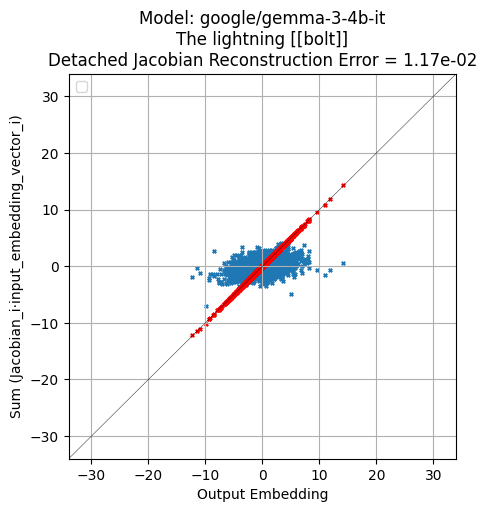

Computing col norms for token position 0
Computing col norms for token position 1
Computing col norms for token position 2
Mode: row_col_vectors


/content/llms-are-llms/src/JacobianAnalyzer.py:1433: UserWarning: Glyph 12420 (\N{HIRAGANA LETTER YA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/content/llms-are-llms/src/JacobianAnalyzer.py:1433: UserWarning: Glyph 12363 (\N{HIRAGANA LETTER KA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/content/llms-are-llms/src/JacobianAnalyzer.py:1433: UserWarning: Glyph 2494 (\N{BENGALI VOWEL SIGN AA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/content/llms-are-llms/src/JacobianAnalyzer.py:1433: UserWarning: Matplotlib currently does not support Bengali natively.
  plt.tight_layout()
/content/llms-are-llms/src/JacobianAnalyzer.py:1433: UserWarning: Glyph 2433 (\N{BENGALI SIGN CANDRABINDU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/content/llms-are-llms/src/JacobianAnalyzer.py:1437: UserWarning: Glyph 12420 (\N{HIRAGANA LETTER YA}) missing from font(s) DejaVu Sans.
  plt.savefig(f'{filename_png}.png', dpi=300, bbox_inches='tight')
/content/llms-

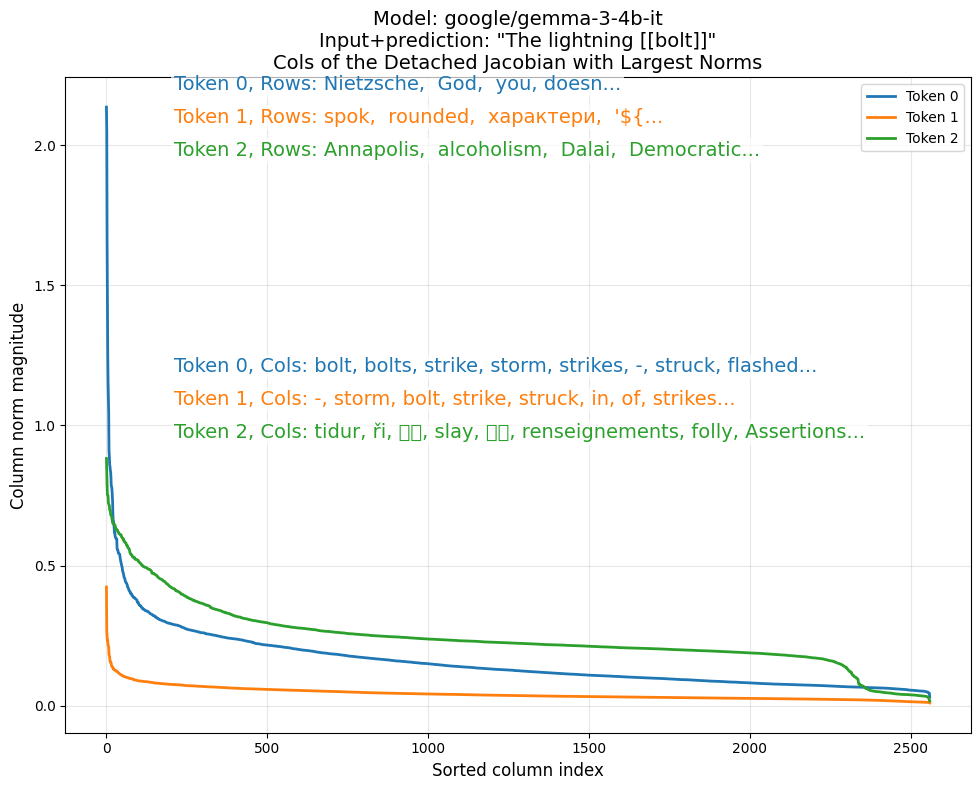

Computing SVD for token position 0
Computing SVD for token position 1
Computing SVD for token position 2
Token 0, U 0, mag=9.40: -  storm  bolt ,  and  struck  of  was
Token 1, U 0, mag=2.06: -  storm  is ,  was  in  of  that
Token 2, U 0, mag=3.84:  strike  strikes  bolt  bolts  fast  struck  flashes  flashed
Mode: singular_vectors


/content/llms-are-llms/src/JacobianAnalyzer.py:1433: UserWarning: Glyph 2474 (\N{BENGALI LETTER PA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/content/llms-are-llms/src/JacobianAnalyzer.py:1433: UserWarning: Matplotlib currently does not support Bengali natively.
  plt.tight_layout()
/content/llms-are-llms/src/JacobianAnalyzer.py:1433: UserWarning: Glyph 2509 (\N{BENGALI SIGN VIRAMA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/content/llms-are-llms/src/JacobianAnalyzer.py:1433: UserWarning: Glyph 2480 (\N{BENGALI LETTER RA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/content/llms-are-llms/src/JacobianAnalyzer.py:1433: UserWarning: Glyph 2503 (\N{BENGALI VOWEL SIGN E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/content/llms-are-llms/src/JacobianAnalyzer.py:1433: UserWarning: Glyph 2478 (\N{BENGALI LETTER MA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/content/llms-are-llms/src/JacobianAnalyzer.py:1433: UserWarning: Glyph 

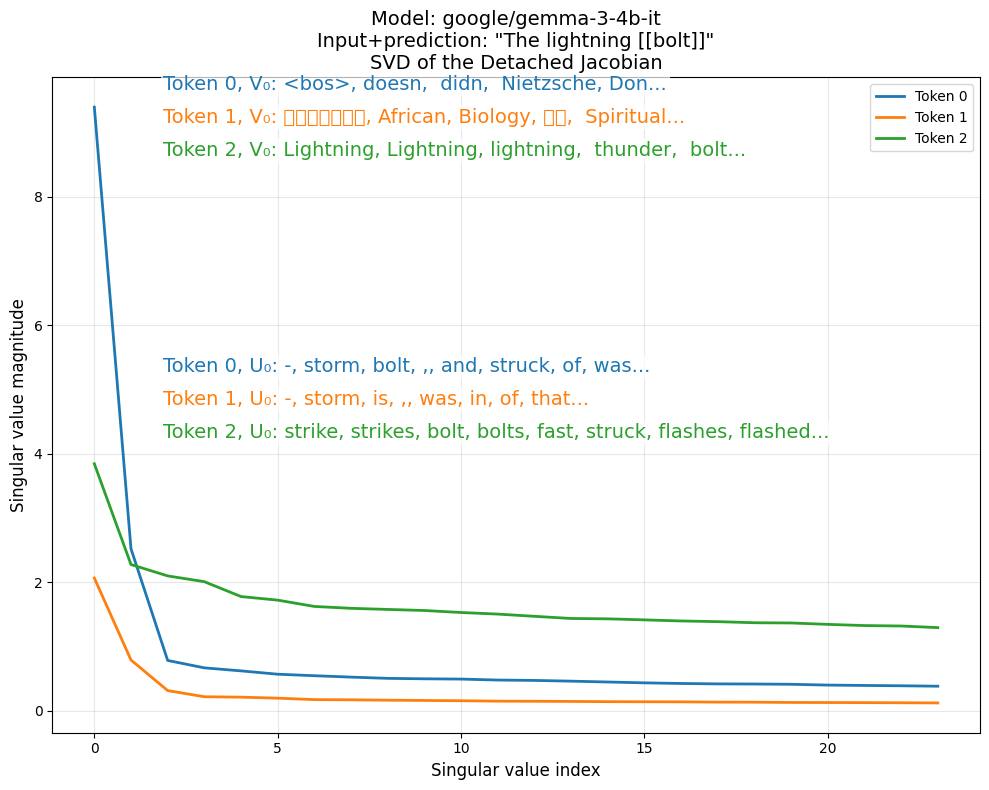

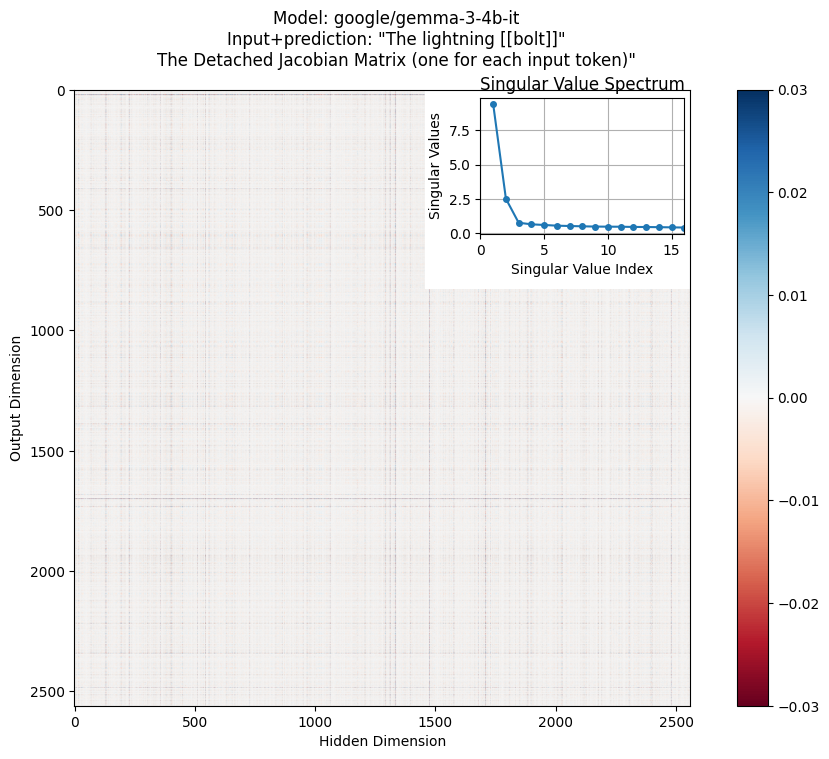

<Figure size 640x480 with 0 Axes>

In [1]:
import os
from google.colab import userdata

# Set environment variables
os.environ["HF_HUB_ENABLE_HF_TRANSFER"] = '1'
os.environ["HF_TOKEN"] = userdata.get('HF_TOKEN')

os.system('git clone https://github.com/jamesgolden1/llms-are-llms.git')
os.chdir('llms-are-llms')
os.system('pip install -r requirements.txt --no-deps')
# os.system(f'python -u run_detached_jacobian.py --hf_token {os.environ["HF_TOKEN"]} --model_name "gemma-3-4b" --text "The lightning"')

# concept to inject into response
text_input = "The lightning"
model_name = "gemma-3-4b"
hf_token = os.environ["HF_TOKEN"]

%run run_detached_jacobian.py --text "{text_input}" --hf_token "{hf_token}" --model_name "{model_name}" --dtype "bfloat16"

In [2]:
analyzer